# KMeans Clustering 

In [96]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [97]:
df= pd.read_csv('income.csv')

In [98]:
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


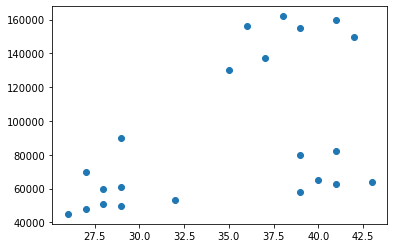

In [99]:
plt.scatter(df['Age'],df['Income($)'])

In [100]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [101]:
y_pred = km.fit_predict(df[['Age','Income($)']])
y_pred

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [102]:
df['cluster']= y_pred

In [92]:
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [103]:
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

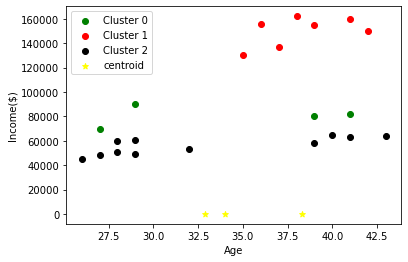

In [104]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1['Income($)'], color='green', label='Cluster 0')
plt.scatter(df2.Age, df2['Income($)'], color='red', label='Cluster 1')
plt.scatter(df3.Age, df3['Income($)'], color='black', label='Cluster 2')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,0],color='yellow',marker='*',label='centroid')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()
plt.show()


In [94]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

In [105]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [107]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [108]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [109]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [110]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

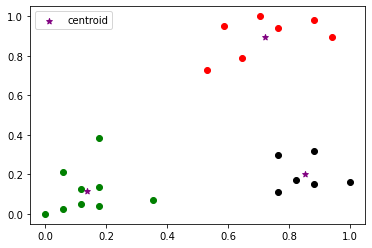

In [111]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [112]:
kr = range(1,15)
sse =[]
for k in kr:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [113]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3687734076440591,
 0.2621792762345213,
 0.22395807059250125,
 0.17355596555312644,
 0.13781880133764024,
 0.10188787724979426,
 0.08272341876466036,
 0.061533596714222503,
 0.0484687368005175,
 0.03810151092446364,
 0.030426552928992826]

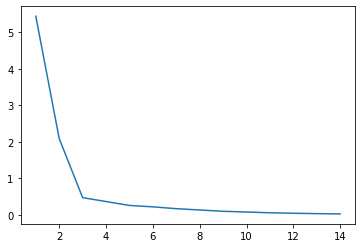

In [114]:
plt.plot(kr,sse)

# 2. Optimizing Mall Operations: K-Means Clustering for Smarter Customer Segmentation

In [115]:
df1 = pd.read_csv('Mall_Customers.csv')
df1

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


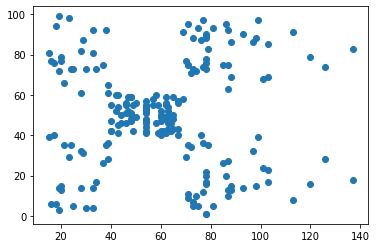

In [118]:
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'])

In [119]:
kr = range(1,15)
sse =[]
for k in kr:
    km = KMeans(n_clusters=k)
    km.fit(df1[['Annual Income (k$)','Spending Score (1-100)']])
    sse.append(km.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [120]:
sse

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37265.86520484345,
 30259.657207285458,
 25028.020475269397,
 21913.929201194416,
 19634.554629349972,
 17595.28888108518,
 15810.838613705504,
 14264.768695356934,
 13150.07185543289]

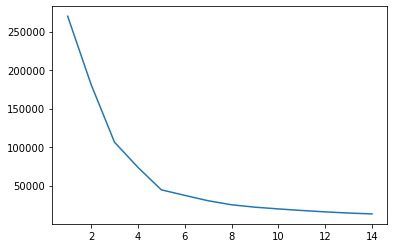

In [121]:
plt.plot(kr,sse)

In [151]:
km = KMeans(n_clusters=5,init='k-means++')
km

KMeans(n_clusters=5)

In [152]:
y_pred = km.fit_predict(df1[['Annual Income (k$)','Spending Score (1-100)']])
y_pred

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0,
       3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 0, 1, 4, 1, 4, 1,
       0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1])

In [153]:
df1['cluster']= y_pred

In [154]:
df1

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,2
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,4
197,198,Male,32,126,74,1
198,199,Male,32,137,18,4


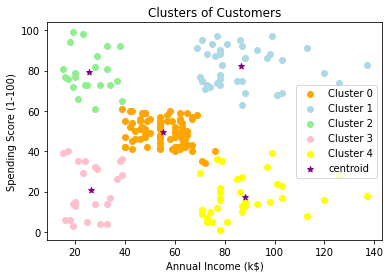

In [163]:
df2=df1[df1.cluster==0]
df3=df1[df1.cluster==1]
df4=df1[df1.cluster==2]
df5=df1[df1.cluster==3]
df6=df1[df1.cluster==4]

plt.scatter(df2['Annual Income (k$)'], df2['Spending Score (1-100)'], color='orange', label='Cluster 0')
plt.scatter(df3['Annual Income (k$)'], df3['Spending Score (1-100)'], color='lightblue', label='Cluster 1')
plt.scatter(df4['Annual Income (k$)'], df4['Spending Score (1-100)'], color='lightgreen', label='Cluster 2')
plt.scatter(df5['Annual Income (k$)'], df5['Spending Score (1-100)'], color='pink', label='Cluster 3')
plt.scatter(df6['Annual Income (k$)'], df6['Spending Score (1-100)'], color='yellow', label='Cluster 4')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters of Customers')
plt.legend()

# Show plot
plt.show()


In [166]:
scaler = MinMaxScaler()

scaler.fit(df1[['Annual Income (k$)']])
df1['Annual Income (k$)'] = scaler.transform(df1[['Annual Income (k$)']])

scaler.fit(df1[['Spending Score (1-100)']])
df1['Spending Score (1-100)'] = scaler.transform(df1[['Spending Score (1-100)']])

In [167]:
km = KMeans(n_clusters=5,init='k-means++')
km

KMeans(n_clusters=5)

In [168]:
y_pred = km.fit_predict(df1[['Annual Income (k$)','Spending Score (1-100)']])
y_pred

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [169]:
df1['cluster']= y_pred

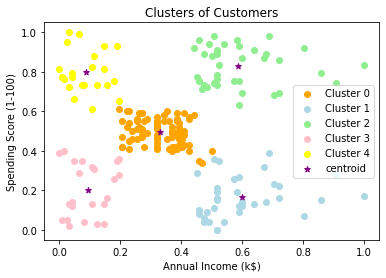

In [170]:
df2=df1[df1.cluster==0]
df3=df1[df1.cluster==1]
df4=df1[df1.cluster==2]
df5=df1[df1.cluster==3]
df6=df1[df1.cluster==4]

plt.scatter(df2['Annual Income (k$)'], df2['Spending Score (1-100)'], color='orange', label='Cluster 0')
plt.scatter(df3['Annual Income (k$)'], df3['Spending Score (1-100)'], color='lightblue', label='Cluster 1')
plt.scatter(df4['Annual Income (k$)'], df4['Spending Score (1-100)'], color='lightgreen', label='Cluster 2')
plt.scatter(df5['Annual Income (k$)'], df5['Spending Score (1-100)'], color='pink', label='Cluster 3')
plt.scatter(df6['Annual Income (k$)'], df6['Spending Score (1-100)'], color='yellow', label='Cluster 4')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters of Customers')
plt.legend()

# Show plot
plt.show()


# Naive Bayes Classifier Algorithm

In [229]:
da = pd.read_csv('insurance_data.csv')
da

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


In [230]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
# from sklearn.naive_bayes import BernoulliNB
# gnb=BernoulliNB()

In [231]:
from sklearn.model_selection import train_test_split

In [232]:
x=da[['age']]
y=da['bought_insurance']

In [233]:
x_train , x_test , y_train,y_test = train_test_split(x,y,test_size=0.2)

In [234]:
gnb.fit(x_train,y_train)

GaussianNB()

In [235]:
gnb.predict(x_test)

array([1, 0, 1, 0, 0, 1], dtype=int64)

In [236]:
gnb.score(x_test,y_test)

1.0

In [237]:
y_test

5     1
26    0
24    1
10    0
19    0
14    1
Name: bought_insurance, dtype: int64

In [238]:
gnb.predict_proba(x_test)

array([[0.0861925 , 0.9138075 ],
       [0.9470671 , 0.0529329 ],
       [0.17416437, 0.82583563],
       [0.97924367, 0.02075633],
       [0.97924367, 0.02075633],
       [0.19531325, 0.80468675]])

# PROJECTS 

# 1. Email SPAM detection (Naive Bayes classifier)

In [253]:
df = pd.read_csv('spam.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [254]:
df['Spam'] = df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [255]:
x_train , x_test, y_train , y_test = train_test_split(df.Message,df.Spam, test_size=0.25)

In [242]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()

In [243]:
x_train = v.fit_transform(x_train.values)


In [244]:
x_train

<4179x7515 sparse matrix of type '<class 'numpy.int64'>'
	with 55445 stored elements in Compressed Sparse Row format>

In [245]:
x_train.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [246]:
from sklearn.naive_bayes import MultinomialNB
nb= MultinomialNB()

In [247]:
nb.fit(x_train,y_train)

MultinomialNB()

In [248]:
x_test= v.transform(x_test)
nb.predict(x_test)

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [249]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = v.transform(emails)
nb.predict(emails_count)

array([0, 1], dtype=int64)

In [250]:
nb.score(x_test,y_test)

0.9877961234745154

# Sklearn Pipeline for Vactorization , Algorithm )

In [263]:
from sklearn.pipeline import Pipeline

In [264]:
pp = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nbp', MultinomialNB())
])

In [265]:
pp.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nbp', MultinomialNB())])

In [266]:
pp.predict(x_test)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [267]:
pp.score(x_test,y_test)

0.9827709978463748

In [268]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
pp.predict(emails)

array([0, 1], dtype=int64)

In [269]:
emails =[
    'hi, i am rikit. working in basicx'
]
pp.predict(emails)

array([0], dtype=int64)

In [271]:
emails =[
    'hi, congrulation now get 75% discount'
]
pp.predict(emails)

array([1], dtype=int64)

# 2 Wine Prediction using  Naive bayes classifier

In [272]:
df= pd.read_csv('wine.csv')
df

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [276]:
target = df['Wine']
x = df.drop(columns='Wine',axis=1)
y=target

In [277]:
x_split , x_test , y_split , y_test = train_test_split(x,y,test_size=0.2)

# MultinomialNB

In [278]:
nb.fit(x_test,y_test)

MultinomialNB()

In [279]:
nb.predict(x_test)

array([1, 3, 3, 3, 1, 3, 2, 1, 1, 3, 3, 1, 3, 1, 3, 3, 2, 1, 3, 2, 3, 3,
       3, 3, 2, 1, 3, 2, 2, 2, 2, 1, 1, 3, 2, 2], dtype=int64)

In [280]:
y_test

50     1
163    3
170    3
131    3
33     1
135    3
113    2
16     1
23     1
100    2
177    3
9      1
172    3
12     1
155    3
104    2
86     2
30     1
146    3
80     2
153    3
130    3
65     2
174    3
118    2
57     1
25     1
91     2
76     2
117    2
71     2
49     1
74     2
21     1
102    2
114    2
Name: Wine, dtype: int64

In [281]:
nb.score(x_test,y_test)

0.8333333333333334

# GaussianNB

In [282]:
gnb = GaussianNB()

In [283]:
gnb.fit(x_test,y_test)

GaussianNB()

In [284]:
gnb.predict(x_test)

array([1, 3, 3, 3, 1, 3, 2, 1, 1, 2, 3, 1, 3, 1, 3, 2, 2, 1, 3, 2, 3, 3,
       2, 3, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2], dtype=int64)

In [285]:
y_test

50     1
163    3
170    3
131    3
33     1
135    3
113    2
16     1
23     1
100    2
177    3
9      1
172    3
12     1
155    3
104    2
86     2
30     1
146    3
80     2
153    3
130    3
65     2
174    3
118    2
57     1
25     1
91     2
76     2
117    2
71     2
49     1
74     2
21     1
102    2
114    2
Name: Wine, dtype: int64

In [286]:
gnb.score(x_test,y_test)

1.0

# 3. Insurance Cost Prediction

In [298]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [303]:
df['smoke']= df['smoker'].apply(lambda x: 1 if x=='yes' else 0)
df
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [304]:
df.replace({'sex':{'male':0,'female':1}},inplace=True)
df

,age,sex,bmi,children,smoker,region,charges,smoke
0,19,1,27.900,0,yes,southwest,16884.92400,1
1,18,0,33.770,1,no,southeast,1725.55230,0
2,28,0,33.000,3,no,southeast,4449.46200,0
3,33,0,22.705,0,no,northwest,21984.47061,0
4,32,0,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,no,northwest,10600.54830,0
1334,18,1,31.920,0,no,northeast,2205.98080,0
1335,18,1,36.850,0,no,southeast,1629.83350,0
1336,21,1,25.800,0,no,southwest,2007.94500,0


In [305]:
df.replace({'region':{'southwest':0,'southeast':1,'northwest':2,'northeast':3}},inplace=True)
df

,age,sex,bmi,children,smoker,region,charges,smoke
0,19,1,27.900,0,yes,0,16884.92400,1
1,18,0,33.770,1,no,1,1725.55230,0
2,28,0,33.000,3,no,1,4449.46200,0
3,33,0,22.705,0,no,2,21984.47061,0
4,32,0,28.880,0,no,2,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,no,2,10600.54830,0
1334,18,1,31.920,0,no,3,2205.98080,0
1335,18,1,36.850,0,no,1,1629.83350,0
1336,21,1,25.800,0,no,0,2007.94500,0


In [321]:
df

,age,sex,bmi,children,region,charges,smoke
0,19,1,27.900,0,0,16884.92400,1
1,18,0,33.770,1,1,1725.55230,0
2,28,0,33.000,3,1,4449.46200,0
3,33,0,22.705,0,2,21984.47061,0
4,32,0,28.880,0,2,3866.85520,0
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,2,10600.54830,0
1334,18,1,31.920,0,3,2205.98080,0
1335,18,1,36.850,0,1,1629.83350,0
1336,21,1,25.800,0,0,2007.94500,0


In [322]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [323]:
x=df.drop(columns="charges",axis=1)
y = df['charges']


In [324]:
x

,age,sex,bmi,children,region,smoke
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,2,0
4,32,0,28.880,0,2,0
...,...,...,...,...,...,...
1333,50,0,30.970,3,2,0
1334,18,1,31.920,0,3,0
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,0,0


In [325]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [327]:
x_train , x_test , y_train,y_test = train_test_split(x,y,test_size=0.2)

In [328]:
reg.fit(x_train,y_train)

LinearRegression()

In [331]:
y_pred = reg.predict(x_test)

In [352]:
reg.score(x_test,y_test)

0.7621210115689221

In [347]:
y_pred

array([ 5357.80042067,  8122.09812985, 25572.09759409, 10743.19457491,
         421.22228691, 33339.3789817 , 29468.61652917,  2032.43398706,
       12485.88683291, 10125.11226731,  7615.4124895 ,  8913.51133879,
        3930.32266642,  9965.21128124,  1809.01879019,  4458.78807109,
       29631.4822343 , 11454.37358916, 17454.87603224, 34944.67708067,
        9707.60741243, 11345.48798716, 13941.01187793, 33407.4107285 ,
       13759.63571989, 10372.52111193, 39244.12757463,  4747.09269585,
       10459.37617107,  5351.4747733 ,  6204.66484977, 16203.93369636,
        1165.4451698 ,  9644.45987005, 11936.35175562, 14188.08777038,
       11191.43686436,  9157.78629572,  3944.26769197,  3993.16071542,
       14588.47022644, 15940.80481376,  7742.44832644,  7437.39001116,
        7037.48392605,  9625.13969034,  3854.6792757 , 30855.41472754,
       12594.43745249, 32428.19409347, 27582.76982822,  8415.9819506 ,
       11700.43105832,  7772.55819465,  7516.01646506, 36657.92610702,
      

In [355]:
print(y_test.to_string())

1113     5312.16985
913      7626.99300
857     15817.98570
257      5400.98050
1080    11884.04858
1049    39727.61400
1011    18767.73770
217      2483.73600
925     25333.33284
59       5989.52365
166      4830.63000
764      9095.06825
1276     2741.94800
184      7731.42710
1054     3353.47030
506      2643.26850
954     20009.63365
594      5709.16440
199     14901.51670
1090    41676.08110
666      8703.45600
396      8522.00300
889     11945.13270
725     40932.42950
649     12430.95335
152      6334.34355
175     48824.45000
50       2211.13075
447     11454.02150
391      2138.07070
204      7147.10500
323     11566.30055
133      1632.56445
178      8823.27900
1050     8023.13545
904     12644.58900
970     10702.64240
450      7512.26700
451      4032.24070
1181     2850.68375
978      9704.66805
1258    30063.58055
183      7419.47790
800      7046.72220
785      6414.17800
425      9788.86590
468     23288.92840
1307    21472.47880
433     12638.19500
1300    62592.87309


In [348]:
pred_sample = reg.predict([[19,1,27.900,0,0,1]])

In [349]:
pred_sample

array([24921.46199916])

In [351]:
reg.predict([[28,0,33.000,3,1,0]])

array([7332.49873861])